In [20]:
# MNIST Image Recognation - New
# Train Data
# Validate Data
# Test Data
# Yunus Emre Ak

# Ek not: X, Y matriksi temsil etmektedir.

In [2]:
# Matematiksel işlemler için gerekli kütüphane
import numpy as np

# Çizim işlemleri için gerekli kütüphane
import matplotlib.pyplot as plt

# Neural Network için gerekli kütüphaneler
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

# Rastgele için gerekli kütüphane
import random

Using TensorFlow backend.


In [3]:
# Rastgeleliyi sabit kılma (her derleme aynı gelmesini sağlama)
np.random.seed(0)

In [4]:
# 60.000 resim train'e eklenecek
# 10.000 resim test'e eklenecek
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Boyutları gösterme
print("X-Train: ", X_train.shape)
print("X-Test: ", X_test.shape)
print("Y-Train: ", Y_train.shape[0])
print("Y-Test: ", Y_test.shape[0])

X-Train:  (60000, 28, 28)
X-Test:  (10000, 28, 28)
Y-Train:  60000
Y-Test:  10000


In [5]:
# Debug için
# Eğer içindeki koşul sağlanmazsa hata mesajı gösterir durur
assert(X_train.shape[0] == Y_train.shape[0]), "Resimlerin sayısı etiketlerin sayısında eşit değildir."
assert(X_test.shape[0] == Y_test.shape[0]), "Resimlerin sayısı etiketlerin sayısında eşit değildir."
assert(X_train.shape[1:] == (28, 28)), "Resimlerin boyutu 28x28 olmak zorundadır."
assert(X_test.shape[1:] == (28, 28)), "Resimlerin boyutu 28x28 olmak zorundadır."

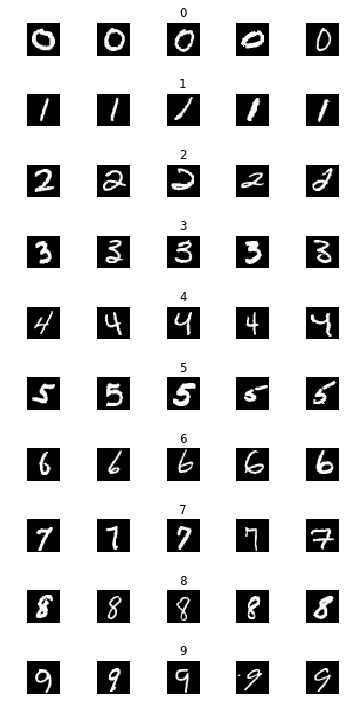

In [6]:
# Numunelerin sayısı
n_samples = []

# Gösterilmek istenen sütun
cols = 5
# 0, ..., 9 a kadar 10 çıktı var
n_classes = 10

# Bir örnekte birden fazla alan gösterme
fig, axs = plt.subplots(nrows=n_classes, ncols=cols, figsize=(5, 10))
# Plot'ların bitişik olmasını engelleme araya boşluk ekleme
fig.tight_layout()

# Tekrarlama yapısı
for i in range(cols):
    for j in range(n_classes):
        # Her bir sayı için girilen inputları alma
        X_selected = X_train[Y_train == j]
        # Girilen inputları ekrana gri olarak çizgirme
        axs[j][i].imshow(X_selected [random.randint(0, len(X_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        # Koordinat sistemini kapatma
        axs[j][i].axis("off")
        
        # Ortadaki verileri örnek olarak alacağız
        if i == 2:
            # Çizimin üstüne başlık koyma
            axs[j][i].set_title(str(j))
            # Seçili olanların sayısını saklama
            n_samples.append(len(X_selected))

Text(0, 0.5, 'Resim sayısı')

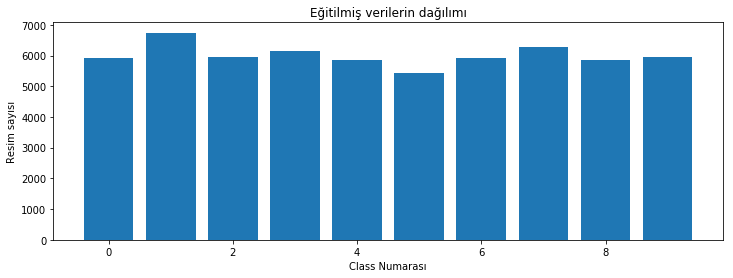

In [7]:
# print(n_samples)

# Veri dağılımını grafikte gösterme

# Çizim boyutunu ayarlama
plt.figure(figsize=(12, 4))

# Grafik çizimi yapma
plt.bar(range(0, n_classes), n_samples)

# Çizime başlık ayarlama
plt.title("Eğitilmiş verilerin dağılımı")

# Etiketleri ayarlama
plt.xlabel("Class Numarası")
plt.ylabel("Resim sayısı")

In [8]:
# 10 tane sayı var
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Normalization İşlemi (0, 1 arasına alma işlemlerde kolaylık sağlayacaktır)
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# Pixel boyutunu hesaplama 28 * 28
n_pixels = X_train.shape[1] * X_train.shape[2]

# Tek boyutlu matriks haline getirip katsayılar matriksi ile çarplamlıyız.
X_train = X_train.reshape(X_train.shape[0], n_pixels)
X_test = X_test.reshape(X_test.shape[0], n_pixels)

In [10]:
def create_model():
    # Modeli tanımalama
    model = Sequential()
    
    # Input layer oluşturma
    model.add(Dense(10, input_dim=n_pixels, activation="relu"))
    
    # Hidden Layer oluşturma
    model.add(Dense(30, activation='relu'))
    
    # Hidden Layer oluşturma
    model.add(Dense(10, activation='relu'))
    
    # Output layer oluşturma
    model.add(Dense(n_classes, activation='softmax'))
    
    # Modeli optimize etme
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [11]:
# Modeli oluşturma
modal = create_model()

# Model'i yazdırma
print(modal.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
fit_modal = modal.fit(X_train, Y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.6310 - acc: 0.8033 - val_loss: 0.3231 - val_acc: 0.9032
Epoch 2/10
54000/54000 [==============================] - 1s 9us/step - loss: 0.3743 - acc: 0.8895 - val_loss: 0.2745 - val_acc: 0.9175
Epoch 3/10
54000/54000 [==============================] - 1s 10us/step - loss: 0.3319 - acc: 0.9027 - val_loss: 0.2723 - val_acc: 0.9177
Epoch 4/10
54000/54000 [==============================] - 1s 11us/step - loss: 0.3155 - acc: 0.9066 - val_loss: 0.2691 - val_acc: 0.9160
Epoch 5/10
54000/54000 [==============================] - 1s 10us/step - loss: 0.3046 - acc: 0.9101 - val_loss: 0.2521 - val_acc: 0.9222
Epoch 6/10
54000/54000 [==============================] - 1s 10us/step - loss: 0.2950 - acc: 0.9125 - val_loss: 0.2406 - val_acc: 0.9255
Epoch 7/10
54000/54000 [==============================] - 1s 11us/step - loss: 0.2836 - acc: 0.9151 - val_loss: 0.2402 - val_acc: 

Text(0.5, 0, 'Epoch (Devir)')

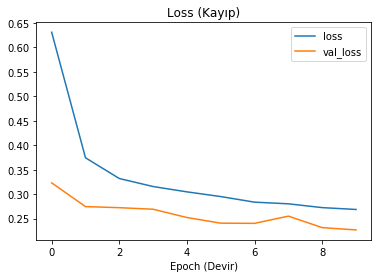

In [13]:
# Epoch'a göre loss grafiği çizdirme
plt.plot(fit_modal.history['loss'])
plt.plot(fit_modal.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss (Kayıp)')
plt.xlabel('Epoch (Devir)')

Text(0.5, 0, 'Epoch (Devir)')

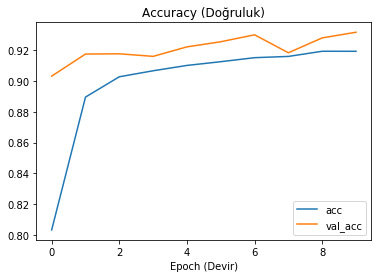

In [14]:
# Epoch'a göre accuracy grafiği çizdirme
plt.plot(fit_modal.history['acc'])
plt.plot(fit_modal.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy (Doğruluk)')
plt.xlabel('Epoch (Devir)')

In [15]:
# İşlemin skorunu ve doğruluğunu gösterme
score = modal.evaluate(X_test, Y_test, verbose=0)
print("Test Skoru: ", score[0])
print("Test Doğruluğu: ", score[1])

Test Skoru:  0.28298339678794143
Test Doğruluğu:  0.9139


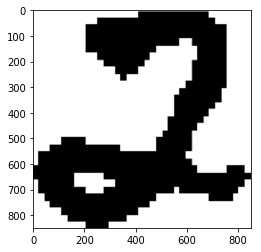

In [16]:
# URL'den resim alma
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)

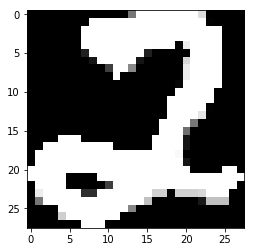

In [17]:
# OpenCV
import cv2

# Resmi diziye çevirme
img = np.asarray(img)

# Resmi inputlarla aynı boyuta getirme
img = cv2.resize(img, (28, 28))

# Siyah-Beyaz Yapma
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resmin tersini alma (255'ten çıkarma)
img = cv2.bitwise_not(img)

# Resmi gösterme
plt.imshow(img, cmap=plt.get_cmap("gray"))

In [18]:
# Normalization (0, 1 arasına çekme)
img = img / 255

# Resmi input'a göre boyutlandırma (gri olduğu için 1, renkli olsa 3,4)
img = img.reshape(1, 784)

# print(resim)

In [19]:
# Test Aşaması
prediction = modal.predict_classes(img)
print("Öngörü: ", str(prediction))

Öngörü:  [5]
